# **Polynomial Regression**

# Polynomial Regression

Polynomial Regression is a form of regression analysis in which the relationship between the independent variable $x$ and the dependent variable $y$ is modelled as an $n$ th degree polynomial in $x$. It is used when the data points do not follow a linear trend.

### The Equation
The general equation for a polynomial regression model is:
$$y = \beta_0 + \beta_1x + \beta_2x^2 + \dots + \beta_nx^n + \epsilon$$

Where:
- $y$ is the dependent variable.
- $x$ is the independent variable.
- $\beta_0, \beta_1, \dots, \beta_n$ are the coefficients to be estimated.
- $n$ is the degree of the polynomial.
- $\epsilon$ is the error term.

### Key Concepts
1.  **Degree of Polynomial:** Choosing the right degree is crucial. A low degree might underfit the data, while a very high degree can lead to overfitting.
2.  **Linearity:** Although the relationship between $x$ and $y$ is non-linear, polynomial regression is considered a form of **multiple linear regression** because the model is linear in terms of its coefficients ($\beta$).
3.  **Feature Transformation:** In practice, this is often implemented by transforming the input features into a polynomial feature set (e.g., using `PolynomialFeatures` from Scikit-Learn) and then applying a standard Linear Regression model.


In [70]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import warnings
warnings.filterwarnings('ignore')

## **2D Polynomial Regression**
> What we will learn below is for 1D feature input

In [71]:
# generating random numbers for x and y

X = 6 * np.random.rand(200, 1) - 3
y = 0.8 * X**2 + 0.9 * X + 2 + np.random.randn(200, 1)

# y = 0.8x^2 + 0.9x + 2
X.shape

(200, 1)

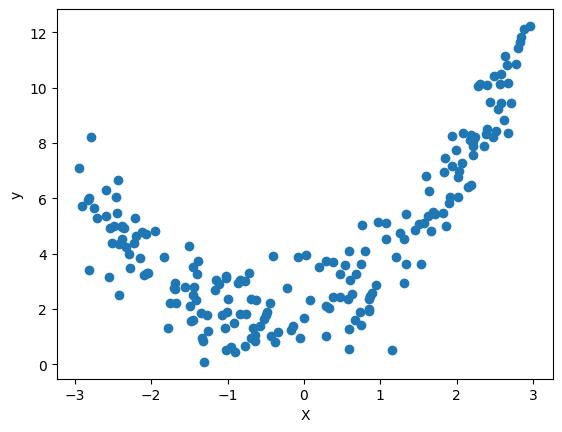

In [72]:
# plt.plot(X, y,'b.')
plt.scatter(X,y)
plt.xlabel("X")
plt.ylabel("y")
plt.show()

# as you can see down below that there is no linear relation btwn the data points

0.3816466841207832


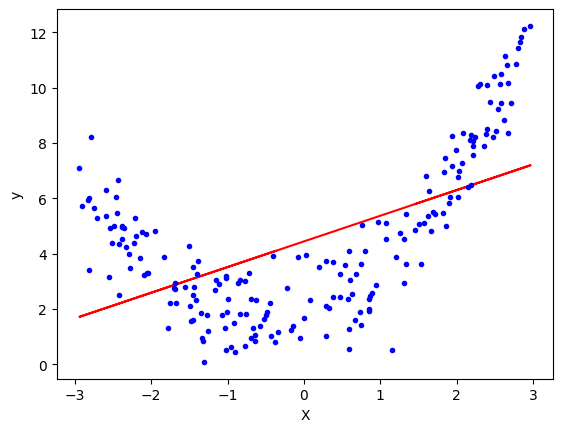

In [73]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

print(r2_score(y_test, y_pred))     # as you can see the score is very low

# plotting the linear reg on graph
plt.plot(X_train, lr.predict(X_train),color='r')
plt.plot(X, y, "b.")
plt.xlabel("X")
plt.ylabel("y")
plt.show()

# as you can see down below the predicted values through linear reg is completely wrong


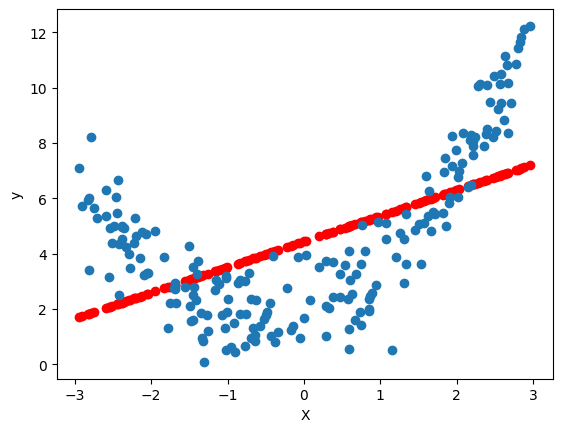

In [74]:
plt.scatter(X_train, lr.predict(X_train), color='r')
plt.scatter(X, y)
plt.xlabel("X")
plt.ylabel("y")
plt.show()


### **Applying Polynomial Regression**

[-0.37520054]
[ 1.         -0.37520054  0.14077544]
0.8991083242499598

[[0]
 [1]
 [2]]


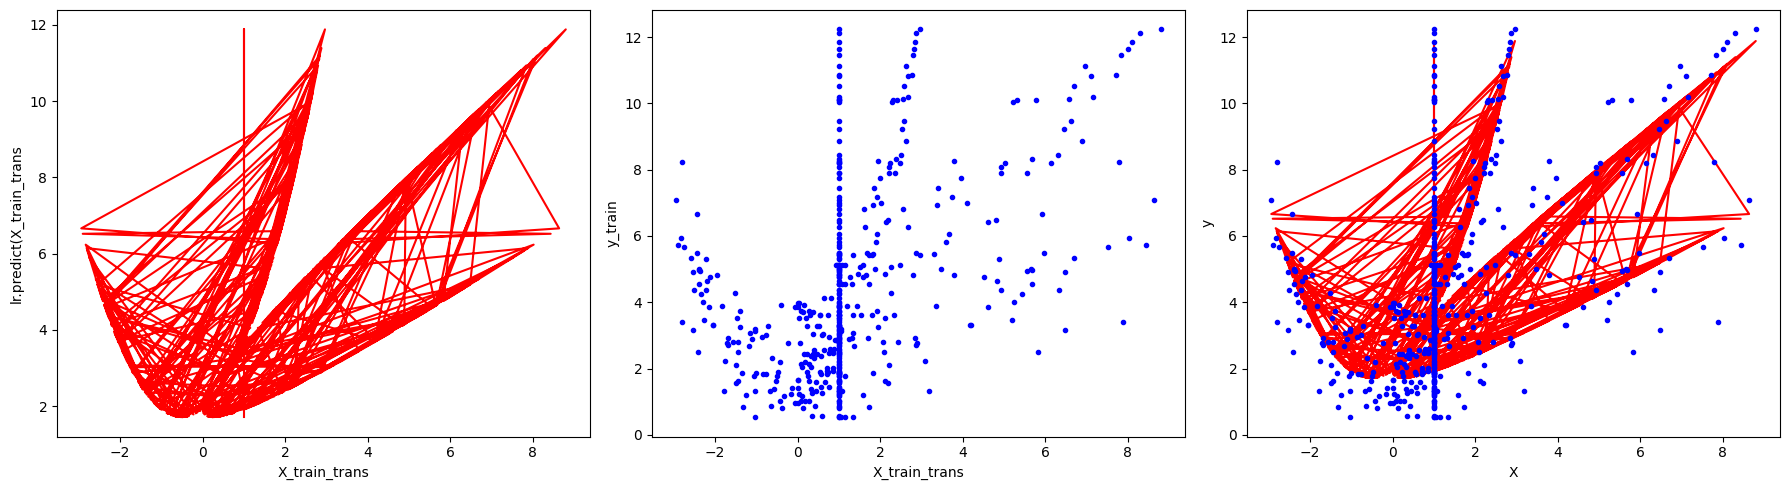

In [75]:
poly = PolynomialFeatures(degree=2, include_bias=True)
# you can change the degree as you like
# what it does is, if you have an input column of 1 then it will convert it into 2 columns

X_train_trans = poly.fit_transform(X_train)
X_test_trans = poly.transform(X_test)

# checking how individual data points look after transformation
print(X_train[0])
print(X_train_trans[0])             # [1.         2.53241824 6.41314217] -- x^0 = 1, x^1, x^2 

# using linear regression to make prediction
lr = LinearRegression()
lr.fit(X_train_trans, y_train)
y_pred = lr.predict(X_test_trans)

print(r2_score(y_test,y_pred))     # as you can see the score has increased to 87 % after applying polynomial reg
print()
print(poly.powers_)                 # will print the powers used


# ***************************************************************************************************************************
# plotting the graph
plt.figure(figsize=(18,5))
plt.subplot(131)
plt.plot(X_train_trans, lr.predict(X_train_trans), color='r')
plt.xlabel("X_train_trans")
plt.ylabel("lr.predict(X_train_trans")

plt.subplot(132)
plt.plot(X_train_trans, y_train, "b.")
plt.xlabel("X_train_trans")
plt.ylabel("y_train")

plt.subplot(133)
plt.plot(X_train_trans, lr.predict(X_train_trans), color='r')
plt.plot(X_train_trans, y_train, "b.")
plt.xlabel("X")
plt.ylabel("y")

plt.tight_layout()
plt.show()
# ***************************************************************************************************************************





## **Polynomial Regression: Understanding the Degree**

In polynomial regression, the **degree** determines the complexity and shape of the curve that fits your data. It represents the highest power of the input feature ($x$) in the equation.

---

### 1. What does the Degree actually do?

* **Degree 1 (Linear):** A straight line.
    * **Equation:** $y = b + m_1x$
    * **Behavior:** Can only capture simple, straight-line trends.
* **Degree 2 (Quadratic):** A curve with one "u-turn" (parabola).
    * **Equation:** $y = b + m_1x + m_2x^2$
    * **Behavior:** Can model data that goes up and then down (or vice versa).
* **Degree 3 (Cubic):** A curve with up to two turns (S-shape).
    * **Equation:** $y = b + m_1x + m_2x^2 + m_3x^3$
    * **Behavior:** More flexible; can wiggle to fit more complex patterns.



---

### 2. The Trade-off (Underfitting vs. Overfitting)

Choosing the degree is the most critical step in polynomial regression.

* **Too Low (Underfitting):** The model is too simple.
    * **Example:** Using a straight line (Degree 1) to fit a curve.
    * **Result:** The model misses the pattern completely (High Bias).
* **Just Right:** The curve follows the general trend of the data effectively.
* **Too High (Overfitting):** The model is too complex.
    * **Example:** Degree 20.
    * **Result:** The curve wiggles wildly to pass through every single noisy data point. It fits training data perfectly but fails to predict new data (High Variance).

[Image comparing underfitting, balanced fit, and overfitting in polynomial regression]

---

### Visual Summary

| Degree | Shape | Flexibility | Risk |
| :--- | :--- | :--- | :--- |
| **1** | Line | Low | Underfitting (High Bias) |
| **2** | Parabola (U) | Medium | Balanced |
| **20** | Wavy / Chaotic | Very High | Overfitting (High Variance) |

# Understanding Polynomial Features
When applying `PolynomialFeatures` in machine learning, we transform our original input features into a larger set of features to capture non-linear relationships.
## 1. Single Feature Case (1 Input)
If you have **1 feature** ($x$) and apply **Degree 2**, the transformer creates the power of that feature.
**Transformation:**
$$ [x] \xrightarrow{\text{Degree 2}} [x, x^2] $$
**Resulting Model:**
$$ y = b + w_1(x) + w_2(x^2) $$
*   This allows a linear model to fit a **curve** (parabola).
---
## 2. Multiple Features Case (3 Inputs)
If you have **3 features** ($a, b, c$) and apply **Degree 2**, the transformer creates squares **AND** interaction terms (combinations of features).
**Original Inputs:**
$$ [a, b, c] $$
**Transformed Outputs (Degree 2):**
1.  **Originals:** $a, b, c$
2.  **Squares:** $a^2, b^2, c^2$
3.  **Interactions:** $ab, ac, bc$
**Total New Features:** 9 (plus bias)
### Why Interaction Terms Matter
Interaction terms like $ab$ (product of $a$ and $b$) allow the model to learn how features affect each other.
*   *Example:* If $a$ is specific length and $b$ is width, then $ab$ represents **Area**. The model effectively "discovers" Area as a useful feature.
---
## 3. Feature Explosion (The Warning)
The number of features grows very fast as you increase the number of inputs ($N$) or the degree ($d$).
**Formula for Total Output Features (including bias):**
$$ N_{new} = \frac{(N+d)!}{N! d!} $$
| Input Features ($N$) | Degree ($d$) | Output Features |
| :--- | :--- | :--- |
| 1 | 2 | 3 |
| 3 | 2 | 10 |
| 3 | 3 | 20 |
| 10 | 2 | 66 |
**Risk:** This rapid expansion can lead to **Overfitting** and the **Curse of Dimensionality** (having too many features for the amount of data available).

[[0.         0.86057231 0.84025709]]
[1.92962093]


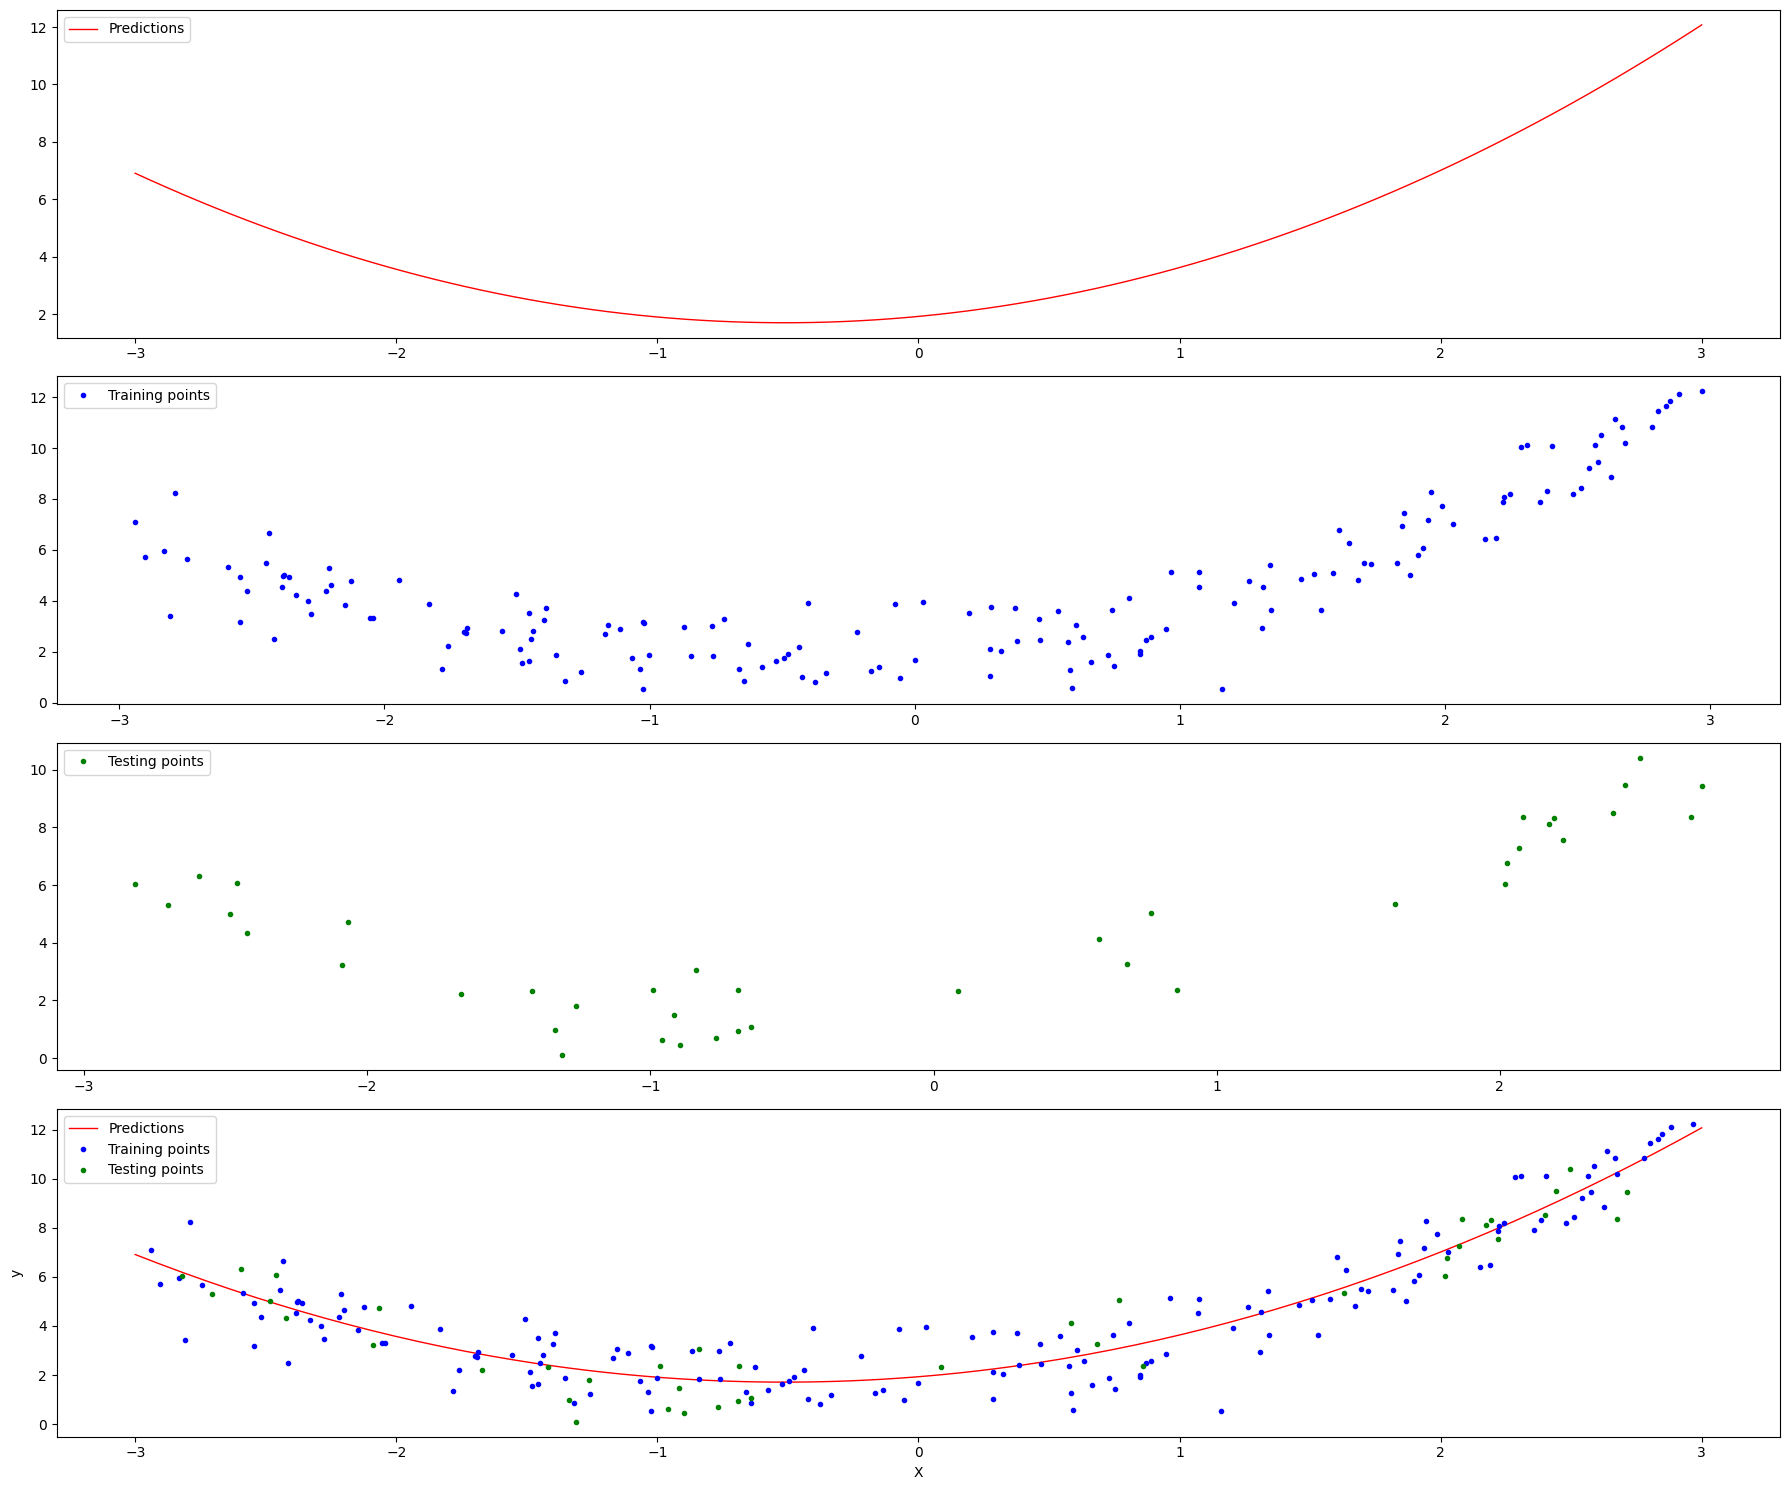

In [76]:
print(lr.coef_)
print(lr.intercept_)

X_new = np.linspace(-3, 3, 200).reshape(200, 1)         # creating a new df as X_new
X_new_poly = poly.transform(X_new)
y_new = lr.predict(X_new_poly)



# ***************************************************************************************************************************
plt.figure(figsize=(18,15))

plt.subplot(411)
plt.plot(X_new, y_new, color='r', linewidth=1, label="Predictions")
plt.legend()

plt.subplot(412)
plt.plot(X_train, y_train, "b.", label='Training points')
plt.legend()

plt.subplot(413)
plt.plot(X_test, y_test, "g.", label='Testing points')
plt.legend()

plt.subplot(414)
plt.plot(X_new, y_new, color='r', linewidth=1, label="Predictions")
plt.plot(X_train, y_train, "b.", label='Training points')
plt.plot(X_test, y_test, "g.", label='Testing points')
plt.legend()

plt.xlabel("X")
plt.ylabel("y")
plt.tight_layout()
plt.show()

# ***************************************************************************************************************************


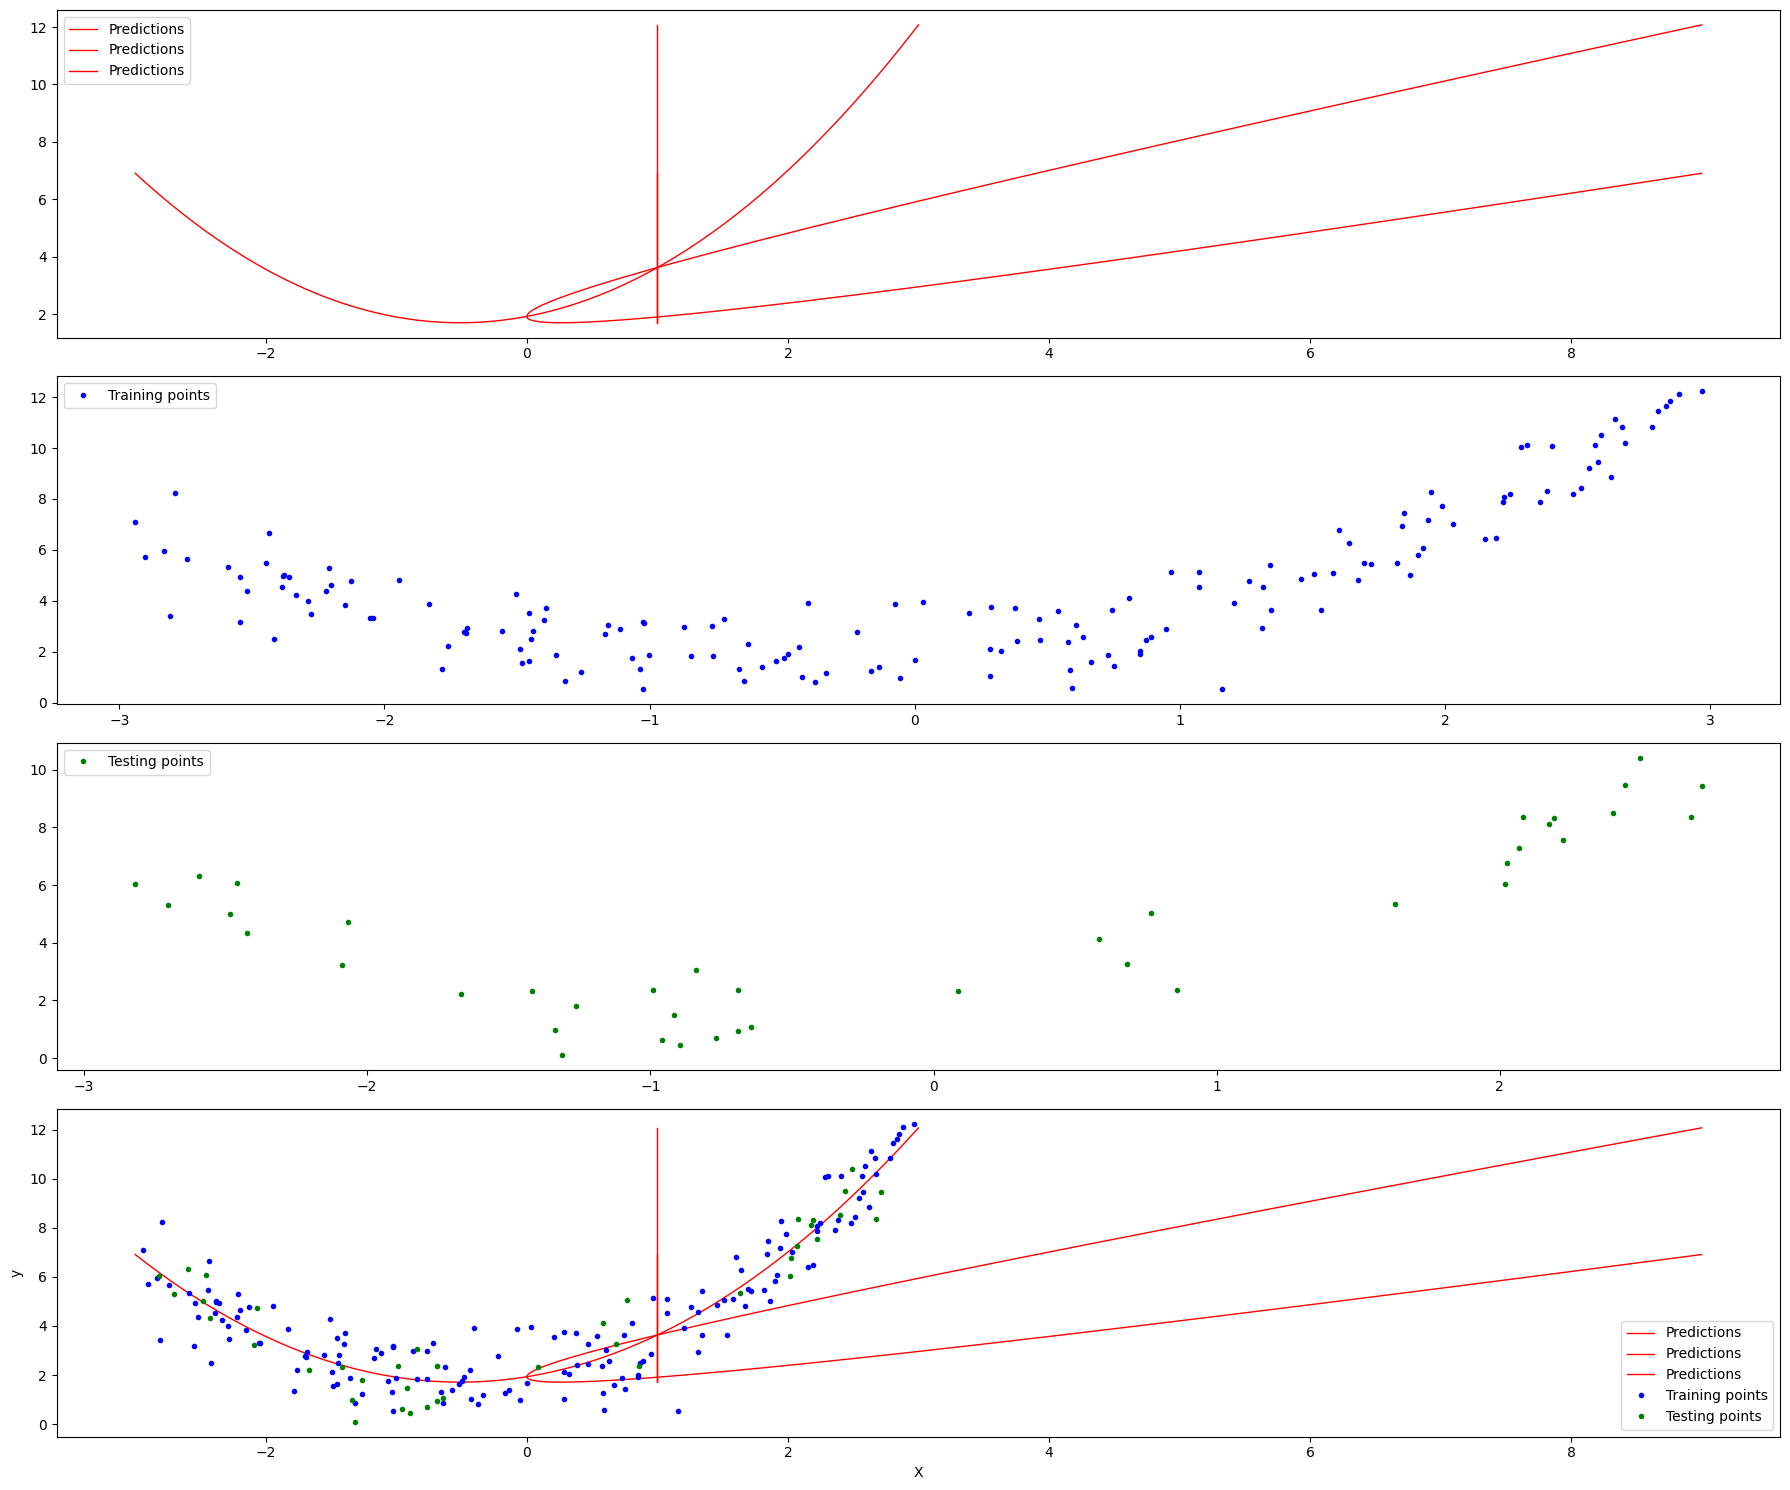

In [77]:
plt.figure(figsize=(18,15))

plt.subplot(411)
plt.plot(X_new_poly, y_new, color='r', linewidth=1, label="Predictions")
plt.legend()

plt.subplot(412)
plt.plot(X_train, y_train, "b.", label='Training points')
plt.legend()

plt.subplot(413)
plt.plot(X_test, y_test, "g.", label='Testing points')
plt.legend()

plt.subplot(414)
plt.plot(X_new_poly, y_new, color='r', linewidth=1, label="Predictions")
plt.plot(X_train, y_train, "b.", label='Training points')
plt.plot(X_test, y_test, "g.", label='Testing points')
plt.legend()

plt.xlabel("X")
plt.ylabel("y")
plt.tight_layout()
plt.show()

## **3D Polynomial Regressioin**
> What we will learn below is for 3D polynomial regression

In [78]:
x = 7 * np.random.rand(100, 1) - 2.8
y = 7 * np.random.rand(100, 1) - 2.8
z = x**2 + y**2 + 0.2*x + 0.2*y + 0.1*x*y +2 + np.random.randn(100, 1)
# z = x^2 + y^2 + 0.2x + 0.2y + 0.1xy + 2


print(x.shape)
print(y.shape)
print(z.shape)

(100, 1)
(100, 1)
(100, 1)


In [79]:
# plotting the data in 3D

df = px.data.iris()
fig = px.scatter_3d(df, x=x.ravel(), y=y.ravel(), z=z.ravel())
fig.show()




In [ ]:
lr = LinearRegression()
lr.fit(np.array([x, y]).reshape(100, 2), z)         # here we have taken (x,y) together as input and z as output feature

x_input = np.linspace(x.min(), x.max(), 10)         # will divide the number from x min to x max in 10 equal parts
y_input = np.linspace(y.min(), y.max(), 10)

xGrid, yGrid = np.meshgrid(x_input, y_input)

final = np.vstack((xGrid.ravel().reshape(1,100), yGrid.ravel().reshape(1,100))).T

z_final = lr.predict(final).reshape(10,10)

In [81]:
print(np.linspace(1, 10, 5))
print(x_input)
print(x_input.shape)
print(y_input.shape)
print(xGrid.shape)
print(yGrid.shape)
print(x_input == y_input)


[ 1.    3.25  5.5   7.75 10.  ]
[-2.76949626 -2.00819362 -1.24689099 -0.48558835  0.27571429  1.03701693
  1.79831956  2.5596222   3.32092484  4.08222748]
(10,)
(10,)
(10, 10)
(10, 10)
[False False False False False False False False False False]


In [82]:
# plotting the graph
import plotly.graph_objects as go
fig = px.scatter_3d(df, x=x.ravel(), y=y.ravel(), z=z.ravel())
fig.add_trace(go.Surface(x = x_input, y = y_input, z =z_final ))
fig.show()


### **Understanding `np.meshgrid`**
`np.meshgrid` is essential for 3D plotting (like surfaces or contour plots). It takes two 1D arrays representing the X and Y axes and converts them into two 2D matrices that represent a **rectangular grid of coordinates**.
#### **1. The Goal**
Imagine you define the X-axis tick marks as `[1, 2, 3]` and the Y-axis tick marks as `[10, 20]`.
To plot a surface, you need the coordinates for **every intersection point** on that grid:
*   (1, 10), (2, 10), (3, 10)
*   (1, 20), (2, 20), (3, 20)
#### **2. How Meshgrid Works**
It repeats the arrays to fill the grid structure.
```python
x = [1, 2, 3]
y = [10, 20]
xx, yy = np.meshgrid(x, y)

In [83]:
X_multi = np.array([x,y]).reshape(100,2)
print(X_multi.shape)

poly = PolynomialFeatures(degree=30)
X_multi_trans = poly.fit_transform(X_multi)

# print("Input",poly.n_input_features_)
print("Ouput",poly.n_output_features_)
print("Powers\n",poly.powers_)

print(X_multi_trans.shape)


(100, 2)
Ouput 496
Powers
 [[ 0  0]
 [ 1  0]
 [ 0  1]
 [ 2  0]
 [ 1  1]
 [ 0  2]
 [ 3  0]
 [ 2  1]
 [ 1  2]
 [ 0  3]
 [ 4  0]
 [ 3  1]
 [ 2  2]
 [ 1  3]
 [ 0  4]
 [ 5  0]
 [ 4  1]
 [ 3  2]
 [ 2  3]
 [ 1  4]
 [ 0  5]
 [ 6  0]
 [ 5  1]
 [ 4  2]
 [ 3  3]
 [ 2  4]
 [ 1  5]
 [ 0  6]
 [ 7  0]
 [ 6  1]
 [ 5  2]
 [ 4  3]
 [ 3  4]
 [ 2  5]
 [ 1  6]
 [ 0  7]
 [ 8  0]
 [ 7  1]
 [ 6  2]
 [ 5  3]
 [ 4  4]
 [ 3  5]
 [ 2  6]
 [ 1  7]
 [ 0  8]
 [ 9  0]
 [ 8  1]
 [ 7  2]
 [ 6  3]
 [ 5  4]
 [ 4  5]
 [ 3  6]
 [ 2  7]
 [ 1  8]
 [ 0  9]
 [10  0]
 [ 9  1]
 [ 8  2]
 [ 7  3]
 [ 6  4]
 [ 5  5]
 [ 4  6]
 [ 3  7]
 [ 2  8]
 [ 1  9]
 [ 0 10]
 [11  0]
 [10  1]
 [ 9  2]
 [ 8  3]
 [ 7  4]
 [ 6  5]
 [ 5  6]
 [ 4  7]
 [ 3  8]
 [ 2  9]
 [ 1 10]
 [ 0 11]
 [12  0]
 [11  1]
 [10  2]
 [ 9  3]
 [ 8  4]
 [ 7  5]
 [ 6  6]
 [ 5  7]
 [ 4  8]
 [ 3  9]
 [ 2 10]
 [ 1 11]
 [ 0 12]
 [13  0]
 [12  1]
 [11  2]
 [10  3]
 [ 9  4]
 [ 8  5]
 [ 7  6]
 [ 6  7]
 [ 5  8]
 [ 4  9]
 [ 3 10]
 [ 2 11]
 [ 1 12]
 [ 0 13]
 [14  0]
 [13  1]
 [12  2]
 

In [84]:
lr = LinearRegression()
lr.fit(X_multi_trans,z)

X_test_multi = poly.transform(final)


z_final = lr.predict(X_multi_trans).reshape(10,10)


# plotting the graph
fig = px.scatter_3d(x=x.ravel(), y=y.ravel(), z=z.ravel())
fig.add_trace(go.Surface(x = x_input, y = y_input, z =z_final))
fig.update_layout(scene = dict(zaxis = dict(range=[0,35])))
fig.show()

